# Say Realz Assignment Model 3

Done by: Zhen Xuan, Shavonne, Kevin

Dataset from UCI Machine Learning Repository: **"Bike Sharing Dataset Data Set"**

Compilation of Dataset: *Hadi Fanaee-T*  

Source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset (requires Login)


# Responding to Our Limitation
In our model 1 vs model 2 analysis, we have identified the limitation of each model.

One of issues is the absence of many variables which skewed our prediction to a limited scope, in our model 3, we will be using MLP, the better of the two models, to see how much more signifcant will our result be.

# Problem Statement:

The problem statement for this dataset is to predict the total number of bikes rented based on the available information. Our goal is to predict the number of bikes rented per hour based on weather and time-related features, to help bike-sharing companies improve bike availability and optimize pricing strategies.
 
This would be a regression problem, and the learning outcome would be to build a model that can accurately predict the number of bikes rented on a given day, which can help bike-sharing companies optimize their inventory and resources.

---

### Essential Libraries

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [3]:
%matplotlib inline
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

---

## Import the Dataset

Importing Dataset for Bike Sharing from "new_before_dropping_hour.csv", this dataset will include all the variables after dummy encoded for our prediction anaylsis

In [4]:
bike_data_hour = pd.read_csv('new_before_dropping_hour.csv')
bike_data_hour.head()

,season,temp,humidity,windspeed,total_count,is_peak_hour,season_Spring,season_Summer,season_Fall,season_Winter,...,weekday_Tuesday,weekday_Wednesday,weekday_Thursday,weekday_Friday,weekday_Saturday,is_workingday_0,is_workingday_1,weather_situation_Clear or Cloudy,weather_situation_Misty or Foggy,weather_situation_Snowy or Rainy
0,0,0.24,0.81,0.0,4.361876,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1,0,0.22,0.80,0.0,6.827897,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
2,0,0.22,0.80,0.0,6.162337,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
3,0,0.24,0.75,0.0,3.892645,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
4,0,0.24,0.75,0.0,0.000000,1,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0


# SKLearn Neural Network MLPRegressor

In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score, mean_squared_log_error
import statsmodels.formula.api as smf
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.regressor import PredictionError, ResidualsPlot
import pickle

In [6]:
X = bike_data_hour.drop(['total_count'], axis=1)
y = bike_data_hour['total_count']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
regr = MLPRegressor(random_state=1, max_iter=500,alpha=1)
regr.fit(X_train, y_train)


MLPRegressor(alpha=1, max_iter=500, random_state=1)

In [9]:
regr.get_params(deep=True)

{'activation': 'relu',
 'alpha': 1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [10]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[-2.96764200e-02,  8.60209138e-02, -1.07936707e-01, ...,
         1.02640801e-01,  1.57744262e-02, -2.66692122e-11],
       [-6.16587571e-01,  5.63508993e-02,  1.79553037e-01, ...,
         8.79996953e-02,  1.93606918e-01, -4.77806281e-33],
       [ 2.68855608e-01,  4.28907117e-03, -7.36373466e-02, ...,
        -2.16739187e-02, -3.03346213e-03, -2.15538691e-27],
       ...,
       [-1.10260887e-01,  3.54478132e-02, -2.29741219e-02, ...,
         2.67610306e-02,  8.33390765e-02, -7.22551078e-34],
       [-1.83122981e-02,  3.08277087e-02,  1.92727242e-02, ...,
         4.99278153e-02,  1.02814339e-01,  3.00915032e-49],
       [ 1.20375664e-01,  2.17225840e-02,  1.40243925e-01, ...,
         3.56070799e-02,  5.91853928e-02,  5.72156946e-50]]), array([[-9.98533962e-001],
       [ 2.04835229e-001],
       [ 6.16832973e-001],
       [ 4.13158094e-001],
       [ 4.86813311e-001],
       [-1.00198227e+000],
       [-8.87962282e-001],
       [ 1.35511871e+000],
    

In [11]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.9629229081274371
Mean Squared Error (MSE) - Train Set 		: 1.0740904220975849
Root Mean Squared Error(RMSE) - Train Set	: 1.0363833374276068


In [12]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.9587948086849465
Mean Squared Error (MSE) - Test Set 		: 1.1696052609775018
Root Mean Squared Error(RMSE) - Test Set	: 1.0814828990684513


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


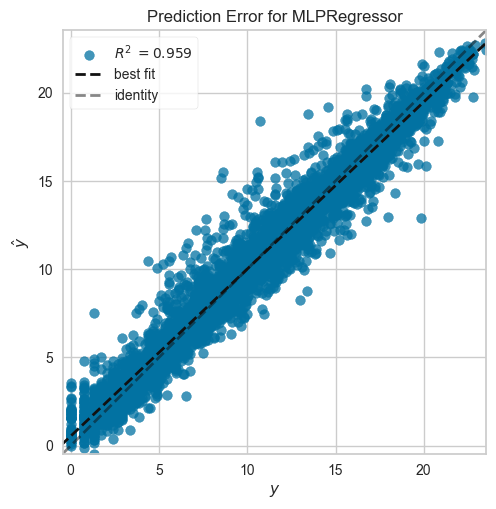

<AxesSubplot: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
visualizer = PredictionError(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


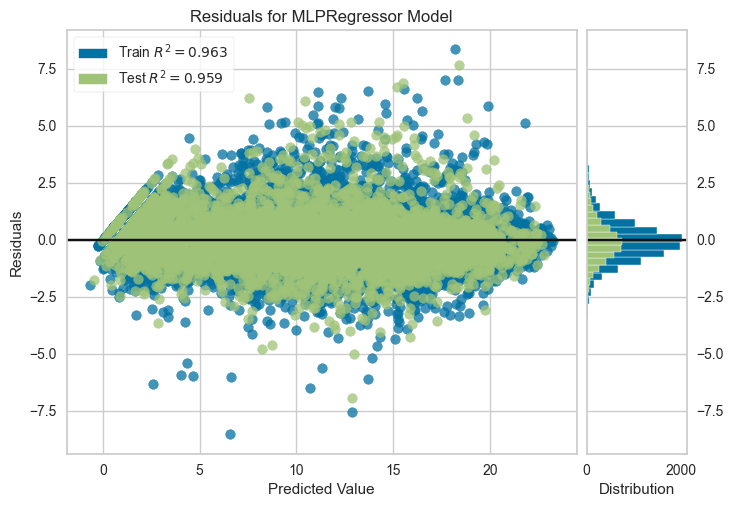

<AxesSubplot: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [14]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

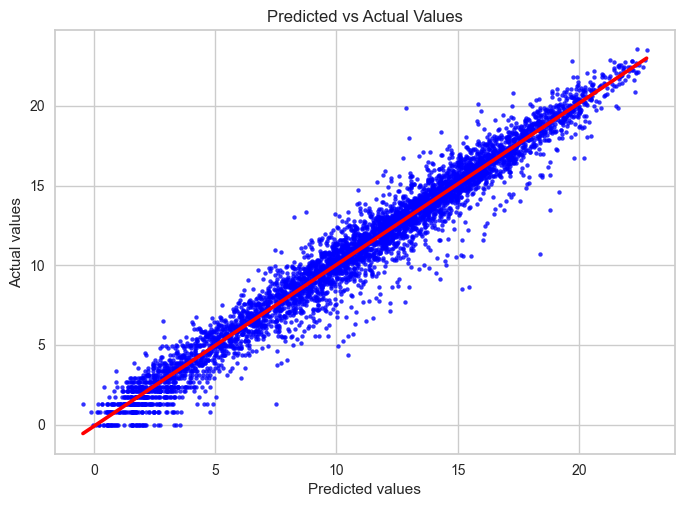

In [15]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

On top part is before we revert the values

Below part is we reverted the values

In [16]:
hour_data = pd.read_csv("hour.csv")

In [17]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [375.95232566 115.54586772   9.03850525 ... 569.74289002 248.84736297
  61.54720459]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [18]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 1743.8826993458363
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 41.75982159140334


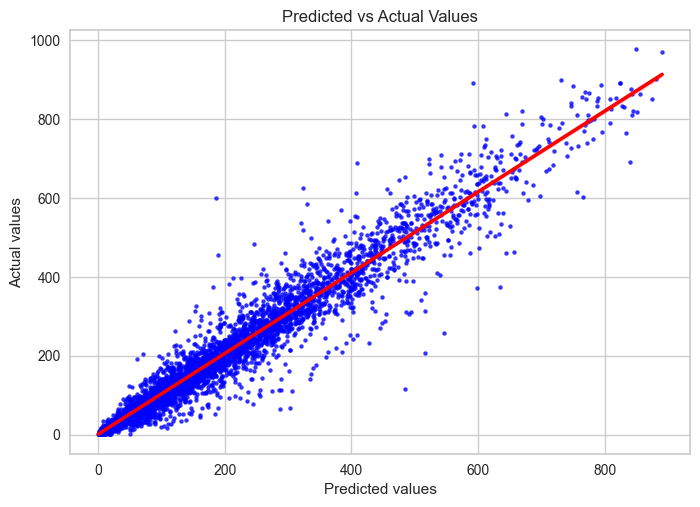

In [19]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

# Cross Validation for Model 3.1

To show that it is not over-fitted and our model is accurate throughtout

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_scores = cross_val_score(regr, X, y, cv=k_folds)

print("Ridge Score for Each Cross Validation Iteration: ",mlp_scores)
print("Average K-Fold Score: ",np.mean(mlp_scores))

Ridge Score for Each Cross Validation Iteration:  [0.95567371 0.95659604 0.95826582 0.95739281 0.95277676]
Average K-Fold Score:  0.9561410283735683


# Using the same hypertuned parameters in Model 2

Mainly focusing on whether using more variables will affect the result, we will be using the same hyper-tuned parameters in model 2

Best hyperparameters:  {'activation': 'tanh', 'alpha': 7.760743574017968, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'learning_rate_init': 0.00948842375044123, 'solver': 'lbfgs', 'tol': 0.0003008386523225142}

## Building New Model

In [23]:
# Create a new MLPRegressor object with the best hyperparameters
regr = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs', alpha=4.222403059659622, learning_rate='constant', learning_rate_init=0.05887330457329267, max_iter=500, tol=0.0007082465313555877, random_state=42)

# Fit the new MLPRegressor object to the training data
regr.fit(X_train, y_train)

# Use the new MLPRegressor object to make predictions on the test data
y_pred = regr.predict(X_test)


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [24]:
regr.get_params(deep=True)

{'activation': 'relu',
 'alpha': 4.222403059659622,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.05887330457329267,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0007082465313555877,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [25]:
# Coefficients of the Ridge Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[-0.04712443,  0.30237941,  0.09584638, ..., -0.09772368,
        -0.13758292, -0.24552113],
       [-0.07903612,  0.15986015,  0.08361227, ...,  0.0510179 ,
         2.21520437,  0.10360941],
       [ 0.06825497, -0.06065664,  0.13359417, ..., -0.0794993 ,
        -1.35172768, -0.219062  ],
       ...,
       [-0.03451767, -0.45910218,  0.14315677, ..., -0.0673101 ,
         0.03986847, -0.17322674],
       [-0.00606898,  0.29306057,  0.14357887, ...,  0.03347812,
         0.07343044, -0.12972163],
       [ 0.08204862, -0.12939919, -0.34763098, ...,  0.06708821,
        -0.15703877,  0.32190316]]), array([[ 0.16375903],
       [ 1.22195238],
       [ 1.55233602],
       [-1.07680742],
       [-0.04452581],
       [ 1.43280658],
       [ 1.10756741],
       [ 1.41449267],
       [-1.4710666 ],
       [-0.00571504],
       [ 0.11930141],
       [ 1.20929768],
       [ 0.49680863],
       [ 1.21267686],
       [ 0.58819348],
       [ 1.65106277],
       [-1.4

In [26]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.9775537269215123
Mean Squared Error (MSE) - Train Set 		: 0.6502485957705699
Root Mean Squared Error(RMSE) - Train Set	: 0.8063799326437693


In [27]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.9609658965800201
Mean Squared Error (MSE) - Test Set 		: 1.107979146813703
Root Mean Squared Error(RMSE) - Test Set	: 1.0526058838965813


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


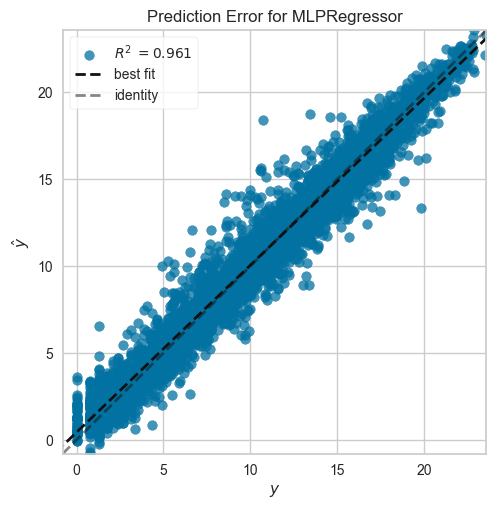

<AxesSubplot: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [28]:
visualizer = PredictionError(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


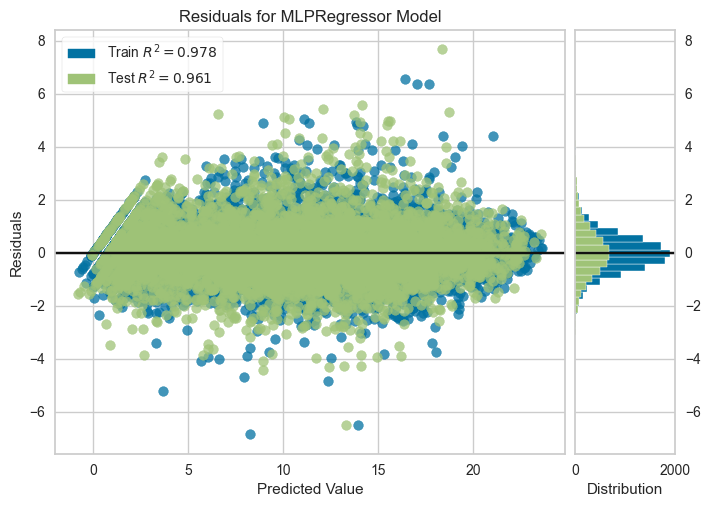

<AxesSubplot: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [29]:
visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.poof()

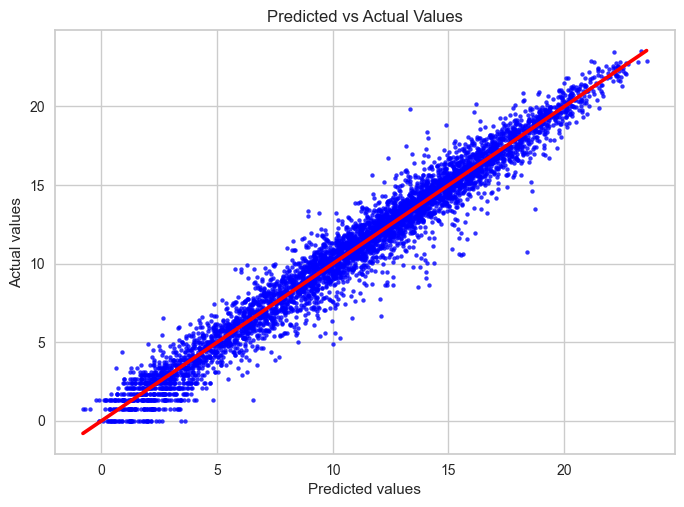

In [30]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=y_test, x=y_test_pred,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

On top part is before we revert the values

Below part is we reverted the values

In [31]:
hour_data = pd.read_csv("hour.csv")

In [32]:
import scipy.stats as stats
from scipy.special import inv_boxcox

# perform box-cox transformation on total_count variable
bc_trans, bc_lambda = stats.boxcox(hour_data['cnt'])

# print the lambda value
print(bc_lambda)

# replace the total_count variable with the box-cox transformed values
# bike_data_hour['total_count'] = bc_trans

# invert the box-cox transformation to get back to the original scale
predicted_scale_normal = inv_boxcox(y_test_pred, bc_lambda)
original_scale_normal = inv_boxcox(y_test, bc_lambda)


# print the original scale values
print("Predicted Values (Back to Original Scale):\n", predicted_scale_normal)
print("Original Values (Back to Original Scale):\n", original_scale_normal)

0.305430867537719
Predicted Values (Back to Original Scale):
 [357.48239048  96.35230406  12.90468496 ... 567.3676849  257.17062369
  70.63407153]
Original Values (Back to Original Scale):
 12830    425.0
8688      88.0
7091       4.0
12230    526.0
431       13.0
         ...  
12749    167.0
11476    214.0
12847    556.0
16721    312.0
9511      72.0
Name: total_count, Length: 5214, dtype: float64


In [33]:
mse = mean_squared_error(original_scale_normal, predicted_scale_normal)

# Accuracy of Predicted vs Actual
print("Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) \t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Mean Squared Error (MSE) - Predicted vs Actual (Back to Scale) 		: 1561.1483379931756
Root Mean Squared Error(RMSE) - Predicted vs Actual (Back to Scale) 	: 39.5113697306633


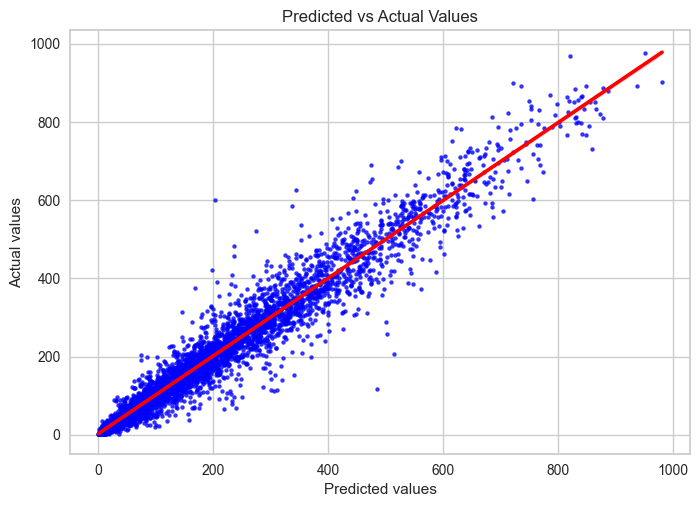

In [34]:
# Create scatter plot of predicted vs actual values
#plt.scatter(inv_test_predictions, inv_y_test)
sb.regplot(y=original_scale_normal, x=predicted_scale_normal,scatter_kws={"color": "blue","s":10}, line_kws={"color": "red"})
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Predicted vs Actual Values")
plt.show()

# Cross Validation for Model 3.2

To show that it is not over-fitted and our model is accurate throughtout

In [35]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


k_folds = KFold(n_splits=5, shuffle=True, random_state=1)

mlp_scores = cross_val_score(regr, X, y, cv=k_folds)



c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptr

In [36]:
print("Ridge Score for Each Cross Validation Iteration: ",mlp_scores)
print("Average K-Fold Score: ",np.mean(mlp_scores))

Ridge Score for Each Cross Validation Iteration:  [0.9597459  0.9609749  0.96156074 0.96125452 0.95841836]
Average K-Fold Score:  0.9603908845399376


# Trying Top 10 Parameters that was found in Ridge model

Referencing back to our Ridge Model

In [37]:
X_train.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)
X_test.drop(['year_2011', 'year_2012', 'season_Spring'], axis=1, inplace=True)

In [38]:
regr.fit(X_train, y_train)


c:\Users\Kevin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(alpha=4.222403059659622, learning_rate_init=0.05887330457329267,
             max_iter=500, random_state=42, solver='lbfgs',
             tol=0.0007082465313555877)

In [39]:
# Coefficients of the MLP Regression line
print('Coefficients \t: a = ', regr.coefs_)
print('Intercept \t: b = ', regr.intercepts_)
print('Loss \t: a = ', regr.loss_)
#print('Validation Scores \t: b = ', regr.validation_scores_)

Coefficients 	: a =  [array([[-0.00394107, -0.09225792, -0.21795445, ...,  0.1107475 ,
        -0.32208528, -0.1362923 ],
       [-0.10314636, -0.41393291, -0.6954261 , ...,  0.00982438,
         0.36640359,  0.01655879],
       [ 0.04444872, -0.59681621, -0.69148667, ..., -0.57503242,
        -0.04041733, -0.12445801],
       ...,
       [ 0.01948267,  0.33217802,  0.29241686, ...,  0.26123981,
        -0.01969071, -0.01820386],
       [-0.0500191 ,  0.48909443, -0.39558342, ..., -0.43627439,
         0.09532673, -0.05902324],
       [-0.04670053, -0.74712526,  0.18302789, ...,  0.33959593,
         0.0365071 , -0.07677577]]), array([[ 1.39943731e-01],
       [ 1.62013313e+00],
       [-1.66097098e+00],
       [ 1.15507797e+00],
       [-9.83410964e-01],
       [-3.98163713e-01],
       [-1.28928549e-01],
       [ 1.06037150e+00],
       [-2.47689894e+00],
       [-1.96253037e-01],
       [-1.42104552e-01],
       [-1.29926467e+00],
       [ 9.46363862e-01],
       [ 1.86323795e+00],


In [40]:
y_train_pred = regr.predict(X_train)

r2 = regr.score(X_train, y_train)
mse = mean_squared_error(y_train, y_train_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Train Set \t\t:", r2)
print("Mean Squared Error (MSE) - Train Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Train Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Train Set 		: 0.9503842584323244
Mean Squared Error (MSE) - Train Set 		: 1.437323967755552
Root Mean Squared Error(RMSE) - Train Set	: 1.198884468060018


In [41]:
y_test_pred = regr.predict(X_test)

r2 = regr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

#Goodness Fit for Train Dataset
print("Explained Variance (R^2) - Test Set \t\t:", r2)
print("Mean Squared Error (MSE) - Test Set \t\t:", mse)
rmse = np.sqrt(mse)
print('Root Mean Squared Error(RMSE) - Test Set\t:', rmse)

# rmsle = np.sqrt(mean_squared_log_error(y_train, y_train_pred))
# print('Root Mean Squared Log Error(RMSLE):', rmsle)

Explained Variance (R^2) - Test Set 		: 0.9228688879242087
Mean Squared Error (MSE) - Test Set 		: 2.189358951864231
Root Mean Squared Error(RMSE) - Test Set	: 1.479648252749359
